# requirements

In [1]:
from google.colab import files

# Upload the Kaggle API key file (kaggle.json)
files.upload()


{}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d jinbonnie/2020-green-taxi-trip-data-in-new-york-city


2020-green-taxi-trip-data-in-new-york-city.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/2020-green-taxi-trip-data-in-new-york-city.zip


Archive:  /content/2020-green-taxi-trip-data-in-new-york-city.zip
replace 2020_Green_Taxi_Trip_Data__January_-_June_.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
# Install PySpark
!pip install pyspark

# EDA

In [6]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Try to create a Spark session
try:
    spark = SparkSession.builder.appName("TaxiTripData").getOrCreate()
    print("Spark session created successfully.")
except Exception as e:
    print(f"Error creating Spark session: {str(e)}")

# Load the CSV file into a PySpark DataFrame
try:
    file_path = "/content/2020_Green_Taxi_Trip_Data__January_-_June_.csv"
    taxi_data = spark.read.csv(file_path, header=True, inferSchema=True)
    # Show the first few rows of the DataFrame
    taxi_data.show()
except Exception as e:
    print(f"Error loading CSV file: {str(e)}")


Spark session created successfully.
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2|12/18/2019 03:52:...| 12/18/2019 03:54:...|                 N|         1|         264|         264|              5|  

In [7]:
taxi_data.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- lpep_dropoff_datetime: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- trip_type: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date
from pyspark.sql.types import StringType

In [9]:
taxi_data.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2|12/18/2019 03:52:...| 12/18/2019 03:54:...|                 N|         1|         264|         264|              5|          0.0|        3.5|  0.5|    0.

In [10]:
# Drop the 'ehail_fee' column
taxi_data = taxi_data.drop("ehail_fee")

# Show the modified DataFrame
taxi_data.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|       2|12/18/2019 03:52:...| 12/18/2019 03:54:...|                 N|         1|         264|         264|              5|          0.0|        3.5|  0.5|    0.5|      0.01|         0.0|    

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp

In [12]:
# Convert date columns to datetime format
date_columns = ["lpep_pickup_datetime", "lpep_dropoff_datetime"]

for column in date_columns:
    taxi_data = taxi_data.withColumn(column, to_timestamp(col(column), "MM/dd/yyyy hh:mm:ss a"))

# Show the modified DataFrame
taxi_data.show(truncate=False)

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|2       |2019-12-18 15:52:30 |2019-12-18 15:54:39  |N                 |1         |264         |264         |5              |0.0          |3.5        |0.5  |0.5    |0.01      |0.0         |0.3 

bar chart

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, dayofweek, when, count

# Assuming taxi_data is your PySpark DataFrame

# Create a Spark session
spark = SparkSession.builder.appName("TrafficAnalysis").getOrCreate()

# Create a new column indicating traffic level based on congestion surcharge values
traffic_data = taxi_data.withColumn("traffic_level",
    when(col("congestion_surcharge").isin([2.5, 0.75, 2.75]), "High Traffic")
    .when(col("congestion_surcharge").isin([-2.75, -0.75, 0]), "Low Traffic")
    .otherwise("No Traffic")
)

# Analyze traffic by hour of the day
hourly_traffic_analysis = traffic_data.groupBy(hour("lpep_pickup_datetime").alias("pickup_hour"), "traffic_level") \
    .agg(count("*").alias("trip_count")) \
    .orderBy("pickup_hour", "traffic_level", ascending=True)

# Show the result
hourly_traffic_analysis.show()

# Find the most traffic hours of the day
# most_traffic_hours = hourly_traffic_analysis.groupBy("pickup_hour") \
#     .agg(count("*").alias("total_trip_count")) \
#     .orderBy("total_trip_count", ascending=False)

# most_traffic_hours.show(1)  # Show the hour with the highest total trip count


+-----------+-------------+----------+
|pickup_hour|traffic_level|trip_count|
+-----------+-------------+----------+
|          0| High Traffic|      2432|
|          0|  Low Traffic|     20047|
|          0|   No Traffic|      2757|
|          1| High Traffic|      1792|
|          1|  Low Traffic|     14075|
|          1|   No Traffic|      1583|
|          2| High Traffic|      1285|
|          2|  Low Traffic|      9606|
|          2|   No Traffic|      1189|
|          3| High Traffic|      1104|
|          3|  Low Traffic|      8145|
|          3|   No Traffic|      2109|
|          4| High Traffic|       906|
|          4|  Low Traffic|      7011|
|          4|   No Traffic|      5353|
|          5| High Traffic|      1383|
|          5|  Low Traffic|      5287|
|          5|   No Traffic|      6713|
|          6| High Traffic|      2943|
|          6|  Low Traffic|     10221|
+-----------+-------------+----------+
only showing top 20 rows



In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour, when, count, row_number
from pyspark.sql.window import Window

# Assuming taxi_data is your PySpark DataFrame

# Create a Spark session
spark = SparkSession.builder.appName("TrafficAnalysis").getOrCreate()

# Create a new column indicating traffic level based on congestion surcharge values
traffic_data = taxi_data.withColumn("traffic_level",
    when(col("congestion_surcharge").isin([2.5, 0.75, 2.75]), "High Traffic")
    .when(col("congestion_surcharge").isin([-2.75, -0.75, 0]), "Low Traffic")
    .otherwise("No Traffic")
)

# Analyze traffic by hour of the day and traffic level
hourly_traffic_analysis = traffic_data.groupBy(hour("lpep_pickup_datetime").alias("pickup_hour"), "traffic_level") \
    .agg(count("*").alias("trip_count"))

# Use window function to rank traffic levels within each hour based on trip count
window_spec = Window.partitionBy("pickup_hour").orderBy(col("trip_count").desc())
ranked_traffic_levels = hourly_traffic_analysis.withColumn("rank", row_number().over(window_spec))

# Select the traffic level with the highest rank for each hour
most_traffic_level_per_hour = ranked_traffic_levels.filter(col("rank") == 1) \
    .select("pickup_hour", "traffic_level", "trip_count") \
    .orderBy("pickup_hour", ascending=True)

# Show the result
most_traffic_level_per_hour.show()


+-----------+-------------+----------+
|pickup_hour|traffic_level|trip_count|
+-----------+-------------+----------+
|          0|  Low Traffic|     20047|
|          1|  Low Traffic|     14075|
|          2|  Low Traffic|      9606|
|          3|  Low Traffic|      8145|
|          4|  Low Traffic|      7011|
|          5|   No Traffic|      6713|
|          6|   No Traffic|     11190|
|          7|  Low Traffic|     21488|
|          8|  Low Traffic|     33359|
|          9|  Low Traffic|     36648|
|         10|  Low Traffic|     36568|
|         11|  Low Traffic|     36814|
|         12|  Low Traffic|     37335|
|         13|  Low Traffic|     39095|
|         14|  Low Traffic|     43607|
|         15|  Low Traffic|     47994|
|         16|  Low Traffic|     52972|
|         17|  Low Traffic|     56250|
|         18|  Low Traffic|     58090|
|         19|  Low Traffic|     52408|
+-----------+-------------+----------+
only showing top 20 rows



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, count, col

# Keep only records where pickup_year is 2020
taxi_data = taxi_data.filter(year(col("lpep_pickup_datetime")) == 2020)

taxi_data = taxi_data.filter(year(col("lpep_dropoff_datetime")) == 2020)

# Show the result
taxi_data.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|       2| 2020-01-01 00:45:58|  2020-01-01 00:56:39|                 N|         5|          66|          65|              2|         1.28|       20.0|  0.0|    0.0|      4.06|         0.0|    

In [17]:
df=taxi_data

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Remove records where RatecodeID is equal to 6 or 99
taxi_data = taxi_data.filter((col("RatecodeID") != 6) & (col("RatecodeID") != 99))

# Show the modified DataFrame
taxi_data.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|       2| 2020-01-01 00:45:58|  2020-01-01 00:56:39|                 N|         5|          66|          65|              2|         1.28|       20.0|  0.0|    0.0|      4.06|         0.0|    

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("NegativeTripDistance").getOrCreate()

# Assuming your DataFrame is named taxi_data
# Replace 'taxi_data' with your actual DataFrame name if different

# Count records with negative trip_distance
negative_trip_distance_count = taxi_data.filter(col("trip_distance") < 0).count()

# Display the count
print(f"Number of records with negative trip_distance: {negative_trip_distance_count}")


Number of records with negative trip_distance: 9


In [20]:
taxi_data = taxi_data.filter((col("trip_distance") >=0))


In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CountTripDistance").getOrCreate()

# Assuming your DataFrame is named taxi_data
# Replace 'taxi_data' with your actual DataFrame name if different

# Count and group by the number of records with trip_distance greater than 10
count_greater_than_10 = taxi_data.filter(col("trip_distance") > 10) \
    .groupBy("trip_distance") \
    .count()

# Show the result
count_greater_than_10.show()


+-------------+-----+
|trip_distance|count|
+-------------+-----+
|         14.9|   50|
|        17.52|   17|
|        12.32|   26|
|         26.7|    8|
|         13.4|   70|
|         15.5|   37|
|        30.49|    2|
|        10.65|   49|
|        17.56|   18|
|        19.98|    7|
|        17.95|   14|
|        23.04|    2|
|        20.49|    8|
|        19.27|   26|
|        16.75|   17|
|         15.4|   33|
|        15.92|   13|
|        24.19|    6|
|        16.54|   10|
|        39.42|    1|
+-------------+-----+
only showing top 20 rows



In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Calculate the interquartile range (IQR)
# q1 = taxi_data.approxQuantile("trip_distance", [0.25], 0.01)[0]
# q3 = taxi_data.approxQuantile("trip_distance", [0.75], 0.01)[0]
# iqr = q3 - q1
# quantiles = taxi_data.approxQuantile("trip_distance", [0.01, 0.99], 0.05)

# Define the lower and upper bounds for outliers
lower_bound = 0
upper_bound = 10

# upper_bound = q3 + 1.5 * iqr

# Remove outliers
taxi_data = taxi_data.filter((col("trip_distance") >= lower_bound) & (col("trip_distance") <= upper_bound))

# Show the modified DataFrame without outliers
taxi_data.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|       2| 2020-01-01 00:45:58|  2020-01-01 00:56:39|                 N|         5|          66|          65|              2|         1.28|       20.0|  0.0|    0.0|      4.06|         0.0|    

In [23]:
taxi_data = taxi_data.filter((col("fare_amount") >=0))


In [24]:
from pyspark.sql import SparkSession

# Drop rows with null values
taxi_data = taxi_data.na.drop()

# Show the result
taxi_data.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+
|       2| 2020-01-01 00:45:58|  2020-01-01 00:56:39|                 N|         5|          66|          65|              2|         1.28|       20.0|  0.0|    0.0|      4.06|         0.0|    

<ipython-input-25-364ea849dc75>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = taxi_data.toPandas().corr()


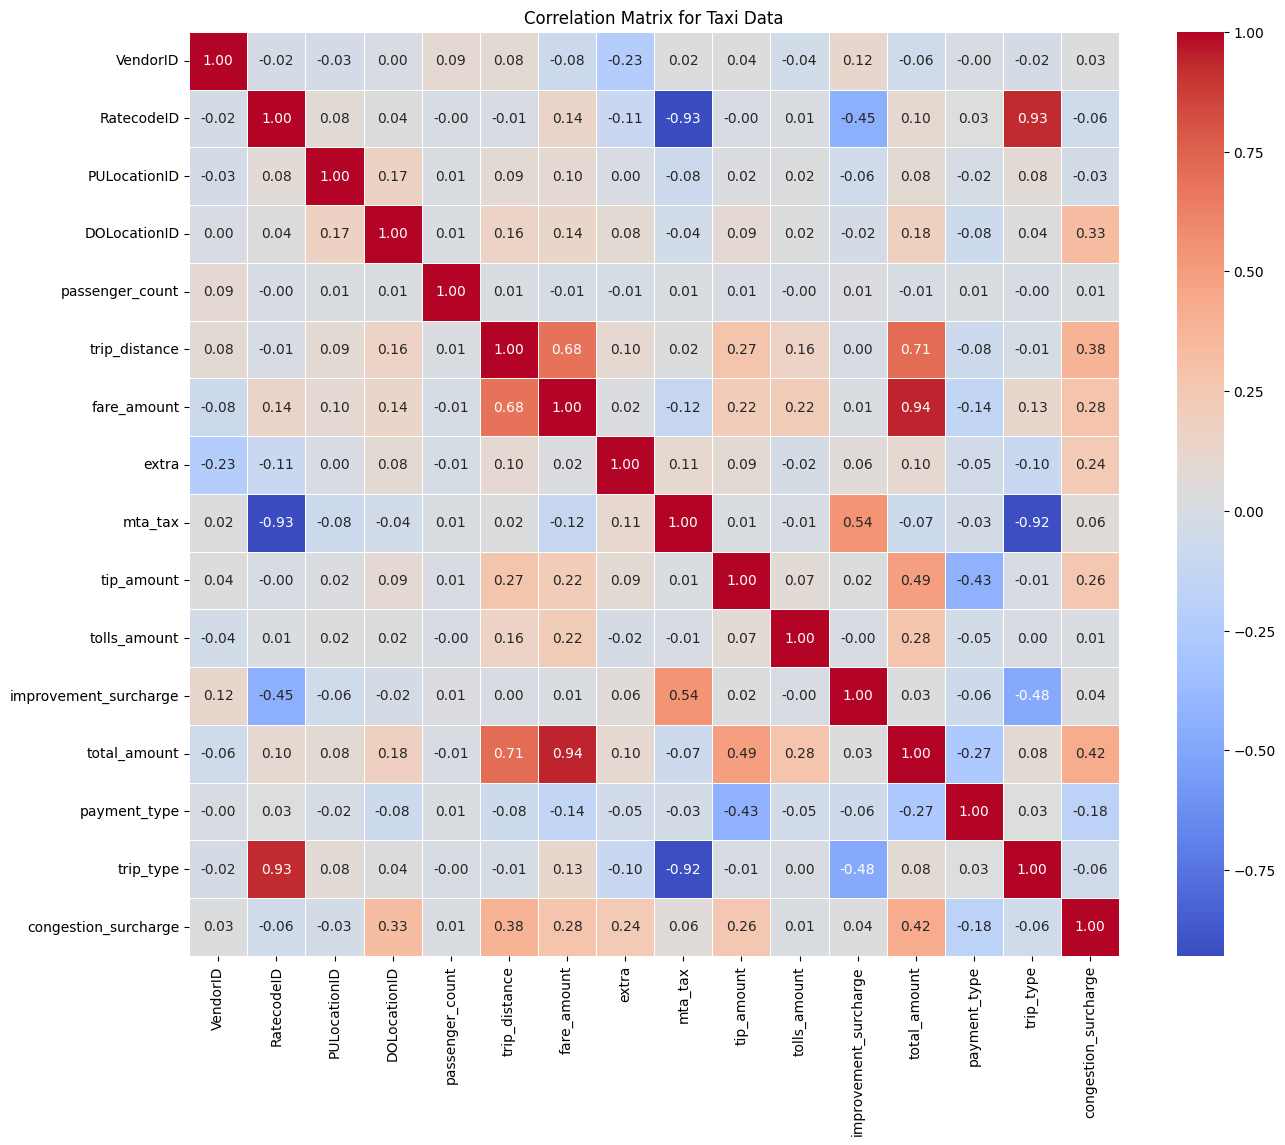

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = taxi_data.toPandas().corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix for Taxi Data")
plt.show()


# machine learning model

In [27]:
from pyspark.sql.functions import year, weekofyear, dayofweek, hour, minute
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Convert timestamp columns to separate features
taxi_data = taxi_data.withColumn("pickup_year", year(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_week", weekofyear(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_day", dayofweek(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_hour", hour(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_minute", minute(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("dropoff_year", year(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_week", weekofyear(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_day", dayofweek(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_hour", hour(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_minute", minute(col("lpep_dropoff_datetime")).cast("double"))

# Assemble features
feature_columns = [
    "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
    "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
     'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
    'payment_type', 'trip_type'
]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
dataset = assembler.transform(taxi_data)

# Split the dataset into training and testing sets
train_data, test_data = dataset.randomSplit([0.8, 0.2], seed=42)

# Linear Regression with default parameters
lr = LinearRegression(featuresCol="features", labelCol="fare_amount")

# Fit the model
model = lr.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")


Root Mean Squared Error (RMSE) on test data: 5.1860108398977784


In [28]:
# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="mae")
evaluator_mse = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="mse")

rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"Mean Absolute Error (MAE) on test data: {mae}")
print(f"Mean Squared Error (MSE) on test data: {mse}")

Root Mean Squared Error (RMSE) on test data: 5.1860108398977784
Mean Absolute Error (MAE) on test data: 2.3191903963963765
Mean Squared Error (MSE) on test data: 26.89470843153726


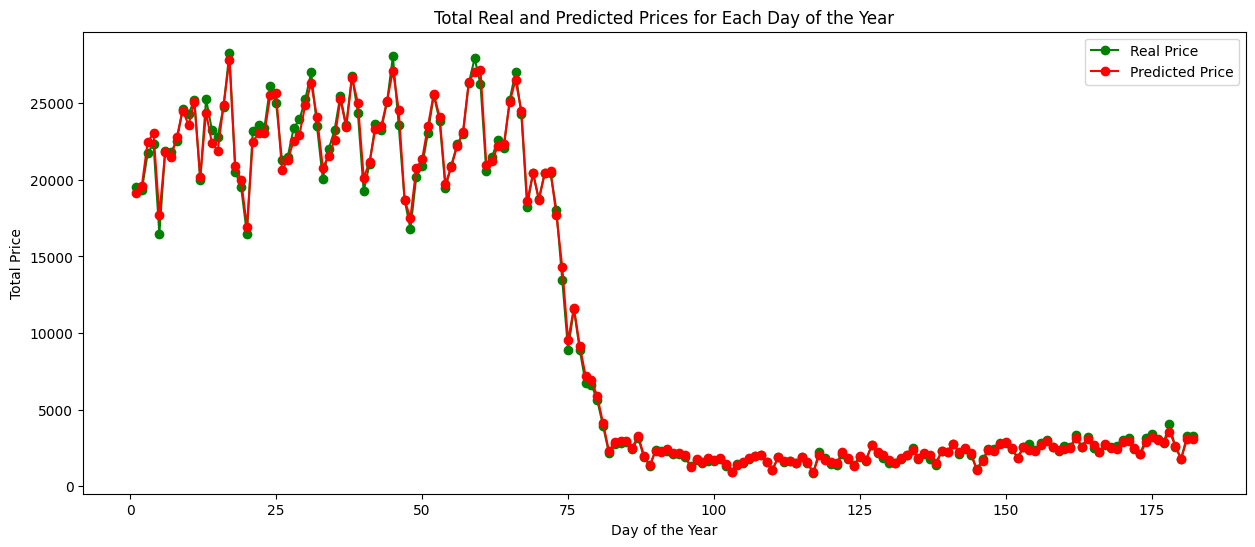

In [34]:
from pyspark.sql.functions import dayofyear

# Add a new column for day of the year
predictions = predictions.withColumn("pickup_day_of_year", dayofyear("lpep_pickup_datetime"))

# Now, you can proceed with the plotting code
day_prices = predictions.select("pickup_day_of_year", "fare_amount", "prediction").toPandas()

# Aggregate total real and predicted prices for each day of the year
agg_data = day_prices.groupby("pickup_day_of_year").agg({"fare_amount": "sum", "prediction": "sum"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_day_of_year"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Real Price')
plt.plot(agg_data["pickup_day_of_year"], agg_data["prediction"], marker='o', linestyle='-', color='red', label='Predicted Price')

plt.title('Total Real and Predicted Prices for Each Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Total Price')
plt.legend()
plt.show()


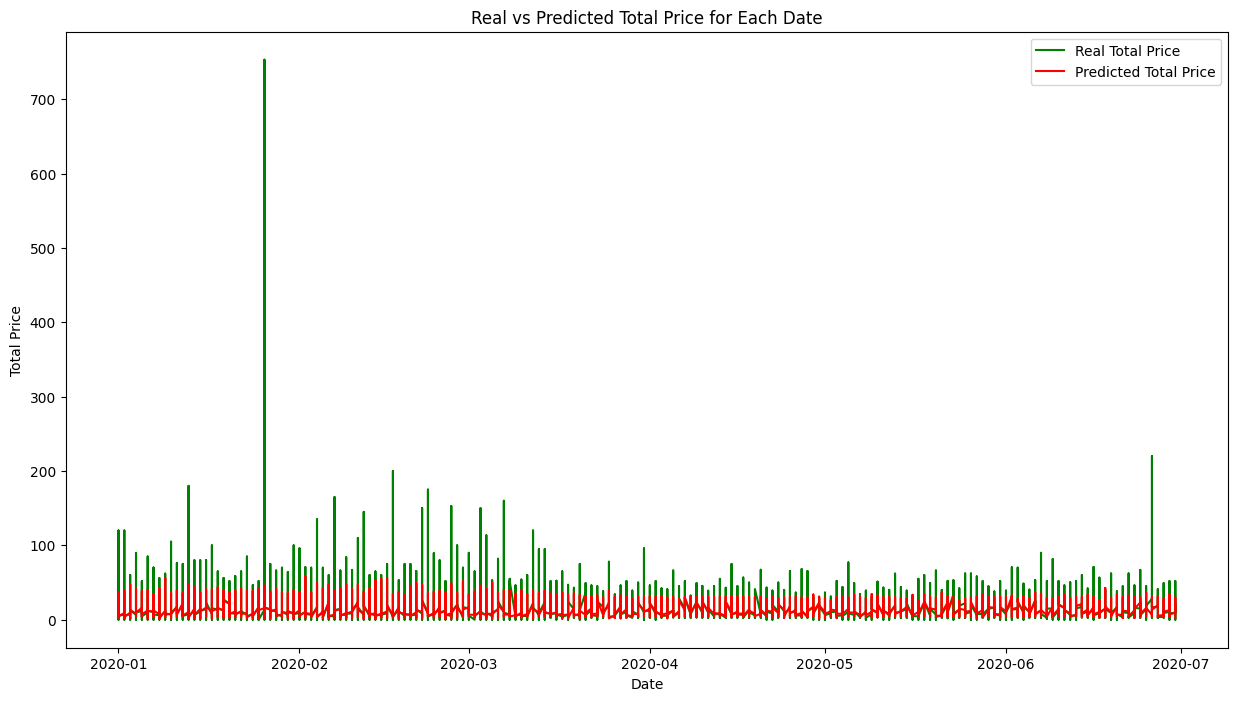

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Calculate total real price and predicted price for each date
daily_totals = predictions.groupBy("lpep_pickup_datetime") \
    .agg({"fare_amount": "sum", "prediction": "sum"}) \
    .withColumnRenamed("sum(fare_amount)", "real_total_price") \
    .withColumnRenamed("sum(prediction)", "predicted_total_price") \
    .orderBy("lpep_pickup_datetime") \
    .toPandas()

# Convert timestamp to date
daily_totals["date"] = pd.to_datetime(daily_totals["lpep_pickup_datetime"]).dt.date

# Plot the results with connected lines
plt.figure(figsize=(15, 8))
plt.plot(daily_totals["date"], daily_totals["real_total_price"], linestyle='-', color='green', label='Real Total Price')
plt.plot(daily_totals["date"], daily_totals["predicted_total_price"], linestyle='-', color='red', label='Predicted Total Price')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Real vs Predicted Total Price for Each Date')
plt.legend()
plt.show()


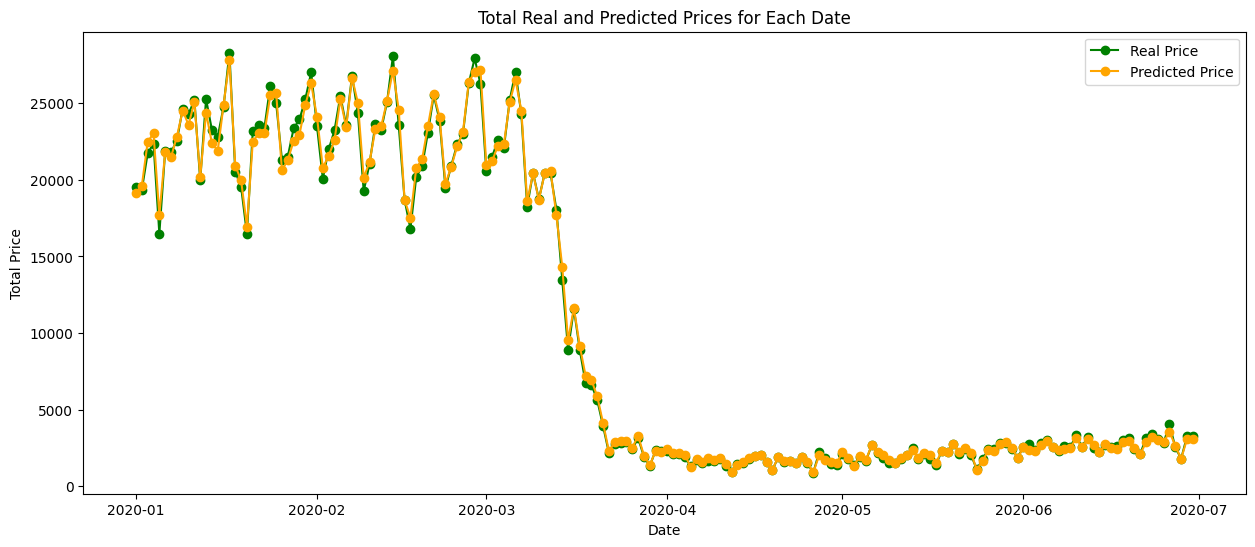

In [36]:
from pyspark.sql.functions import col, to_date

# Assuming 'lpep_pickup_datetime' is the timestamp column in your dataset
predictions = predictions.withColumn("pickup_date", to_date(col("lpep_pickup_datetime")))

# Convert the Spark DataFrame to a Pandas DataFrame
day_prices = predictions.select("pickup_date", "fare_amount", "prediction").toPandas()

# Aggregate total real and predicted prices for each date
agg_data = day_prices.groupby("pickup_date").agg({"fare_amount": "sum", "prediction": "sum"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_date"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Real Price')
plt.plot(agg_data["pickup_date"], agg_data["prediction"], marker='o', linestyle='-', color='orange', label='Predicted Price')

plt.title('Total Real and Predicted Prices for Each Date')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()


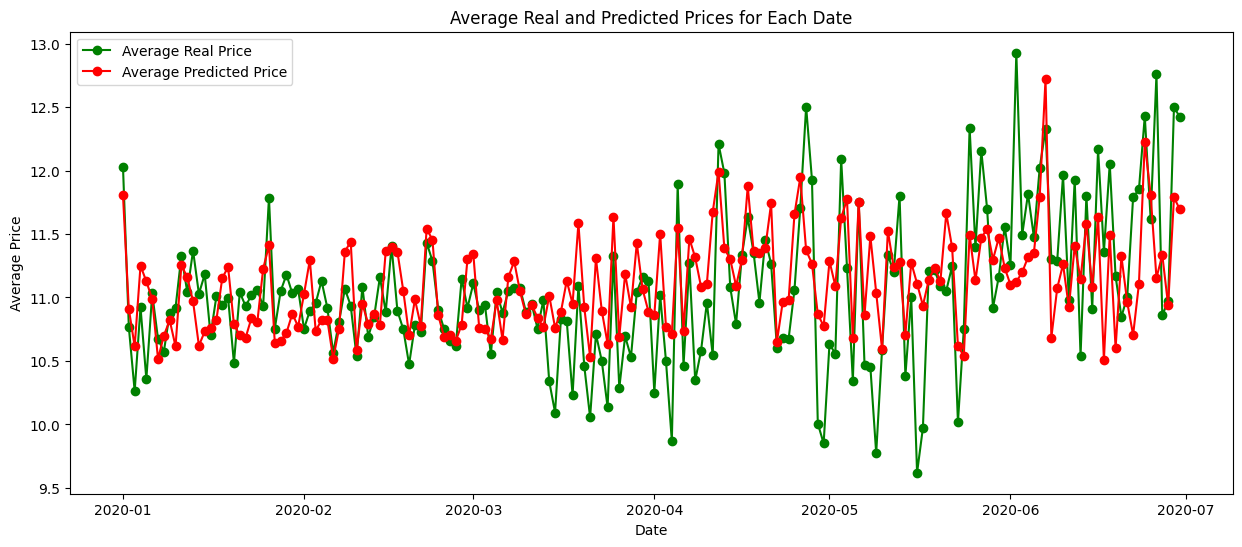

In [37]:
from pyspark.sql.functions import col, to_date
import matplotlib.pyplot as plt

# Assuming 'lpep_pickup_datetime' is the timestamp column in your dataset
predictions = predictions.withColumn("pickup_date", to_date(col("lpep_pickup_datetime")))

# Convert the Spark DataFrame to a Pandas DataFrame
day_prices = predictions.select("pickup_date", "fare_amount", "prediction").toPandas()

# Aggregate average real and predicted prices for each date
agg_data = day_prices.groupby("pickup_date").agg({"fare_amount": "mean", "prediction": "mean"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_date"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Average Real Price')
plt.plot(agg_data["pickup_date"], agg_data["prediction"], marker='o', linestyle='-', color='red', label='Average Predicted Price')

plt.title('Average Real and Predicted Prices for Each Date')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


# weather api

In [ ]:
import requests
from datetime import datetime, timedelta

# Replace with your actual Weatherbit API key
weather_api_key = "df971bf2596b477b923a01e33b596070"

# Initialize an empty dictionary to store weather information
weather_dict = {}

def get_weather_info(date_to_match):
    if date_to_match in weather_dict:
        return weather_dict[date_to_match]
    else:
        city = 'New York,NY'
        url = f'https://api.weatherbit.io/v2.0/history/daily?&city={city}&key={weather_api_key}'
        print(f"We don't have date = {date_to_match.strftime('%Y-%m-%d')} in weather_dict.")
        # url = "https://api.weatherbit.io/v2.0/history/daily"
        start_date = date_to_match.strftime('%Y-%m-%d')
        end_date = (date_to_match + timedelta(days=1)).strftime('%Y-%m-%d')

        params = {
            "start_date": start_date,
            "end_date": end_date,
            "key": weather_api_key
        }

        response = requests.get(url, params=params)
        if response.status_code == 403:
            print(f"Error: API key may be invalid or has insufficient permissions.")
            raise ValueError(response)

        data = response.json()

        data_list = data.get('data', [])
        if not data_list:
            print(f"Error in downloading weather info in date = {date_to_match.strftime('%Y-%m-%d')}: {response}")
            raise ValueError(response)

        # Store weather information in the dictionary
        weather_dict[date_to_match] = data_list[0]

        print(f"Weather data for {date_to_match.strftime('%Y-%m-%d')} updated with new information.")
        return data_list[0]

# Generate a list of dates for the year 2020
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Iterate through each date and get weather information
for date_to_match in date_range:
    weather_info = get_weather_info(date_to_match)
    print(f"Weather for {date_to_match.strftime('%Y-%m-%d')}: {weather_info}")



We don't have date = 2020-01-01 in weather_dict.
Weather data for 2020-01-01 updated with new information.
Weather for 2020-01-01: {'clouds': 2, 'datetime': '2020-01-01', 'dewpt': -4.3, 'dhi': 27, 'dni': 230, 'ghi': 99, 'max_dhi': 92, 'max_dni': 773, 'max_ghi': 427, 'max_temp': 5, 'max_temp_ts': 1577854800, 'max_uv': 1.8, 'max_wind_dir': 266, 'max_wind_spd': 7.6, 'max_wind_spd_ts': 1577880000, 'min_temp': 1.7, 'min_temp_ts': 1577937600, 'precip': 0, 'precip_gpm': 0, 'pres': 1008, 'revision_status': 'final', 'rh': 56.4, 'slp': 1008, 'snow': 0, 'snow_depth': 0, 'solar_rad': 56, 't_dhi': 639, 't_dni': 5510, 't_ghi': 2378, 't_solar_rad': 1334, 'temp': 3.6, 'ts': 1577854800, 'wind_dir': 266, 'wind_gust_spd': 11.2, 'wind_spd': 4.8}
We don't have date = 2020-01-02 in weather_dict.
Weather data for 2020-01-02 updated with new information.
Weather for 2020-01-02: {'clouds': 2, 'datetime': '2020-01-02', 'dewpt': -2.4, 'dhi': 27, 'dni': 230, 'ghi': 100, 'max_dhi': 92, 'max_dni': 774, 'max_ghi': 4

In [ ]:
import csv
from datetime import datetime


# Specify the file path where you want to save the CSV file
csv_file_path = 'weather_data.csv'

# Extract column names from the first entry in the dictionary
columns = list(weather_dict[next(iter(weather_dict))].keys())

# Open the CSV file for writing
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.DictWriter(csvfile, fieldnames=['datetime'] + columns)

    # Write the header to the CSV file
    csv_writer.writeheader()

    # Write each row to the CSV file
    for date, data in weather_dict.items():
        row = {'datetime': date.strftime('%Y-%m-%d')}
        row.update(data)
        csv_writer.writerow(row)

print(f"The CSV file has been saved to: {csv_file_path}")


The CSV file has been saved to: weather_data.csv


# read weather data

In [26]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("ReadWeatherData").getOrCreate()

# Specify the path to your CSV file
csv_file_path = 'weather_data.csv'

# Read the CSV file into a DataFrame
weather_df = spark.read.csv(csv_file_path, header=True)

# Show the resulting DataFrame
weather_df.show()


+----------+------+----------+-----+---+---+---+-------+-------+-------+--------+-----------+------+------------+------------+---------------+--------+-----------+------+----------+----+---------------+----+----+----+----------+---------+-----+-----+-----+-----------+----+----------+--------+-------------+--------+
| datetime0|clouds| datetime2|dewpt|dhi|dni|ghi|max_dhi|max_dni|max_ghi|max_temp|max_temp_ts|max_uv|max_wind_dir|max_wind_spd|max_wind_spd_ts|min_temp|min_temp_ts|precip|precip_gpm|pres|revision_status|  rh| slp|snow|snow_depth|solar_rad|t_dhi|t_dni|t_ghi|t_solar_rad|temp|        ts|wind_dir|wind_gust_spd|wind_spd|
+----------+------+----------+-----+---+---+---+-------+-------+-------+--------+-----------+------+------------+------------+---------------+--------+-----------+------+----------+----+---------------+----+----+----+----------+---------+-----+-----+-----+-----------+----+----------+--------+-------------+--------+
|2020-01-01|     2|2020-01-01| -4.3| 27|230| 99| 

In [43]:
taxi_data.show()

+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+-----------+-----------+----------+-----------+-------------+------------+------------+-----------+------------+--------------+-----------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|pickup_year|pickup_week|pickup_day|pickup_hour|pickup_minute|dropoff_year|dropoff_week|dropoff_day|dropoff_hour|dropoff_minute|pickup_date|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+--------

# use weather data

In [45]:
selected_columns = ['datetime0',
    'max_temp', 'max_uv', 'max_wind_spd',
    'min_temp', 'precip', 'snow', 'snow_depth', 'solar_rad'
]

weather_df_selected = weather_df.select(*selected_columns)
weather_df_selected.show()

+----------+--------+------+------------+--------+------+----+----------+---------+
| datetime0|max_temp|max_uv|max_wind_spd|min_temp|precip|snow|snow_depth|solar_rad|
+----------+--------+------+------------+--------+------+----+----------+---------+
|2020-01-01|       5|   1.8|         7.6|     1.7|     0|   0|         0|       56|
|2020-01-02|     8.9|   2.2|         5.8|     0.6|     0|   0|         0|       69|
|2020-01-03|     8.3|   0.7|         4.5|     6.7|     4|   0|         0|       19|
|2020-01-04|     9.4|   0.7|         6.7|     5.8|     4|   0|         0|       10|
|2020-01-05|     7.2|   1.8|        11.2|     2.8|   0.5|   0|         0|       87|
|2020-01-06|     7.2|   2.2|         7.2|     0.6|   0.5| 3.5|       2.7|       93|
|2020-01-07|     6.7|   1.1|         7.2|       3|   0.5|   0|         0|       47|
|2020-01-08|     6.7|   2.2|         9.4|      -1|     0|   0|         0|       94|
|2020-01-09|     2.2|   2.3|         7.6|    -3.3|     0|   0|         0|   

In [49]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, weekofyear, dayofweek, hour, minute, to_date, col
from pyspark.ml.feature import VectorAssembler

# Create a Spark session
spark = SparkSession.builder.appName("ReadWeatherData").getOrCreate()

# Assuming 'lpep_pickup_datetime' is the timestamp column in taxi_data
taxi_data = taxi_data.withColumn("pickup_date", to_date(col("lpep_pickup_datetime")))

# Replace 'date_column_in_weather_data' with the actual column name in your weather_df
weather_df = weather_df_selected.withColumn("datetime0", to_date(col("datetime0")))

# Merge taxi_data with weather_df_selected based on the pickup_date column
merged_data = taxi_data.join(weather_df_selected, taxi_data.pickup_date == weather_df_selected.datetime0, how='left')

# Drop duplicate columns (pickup_date and datetime0) from the result
merged_data = merged_data.drop("datetime0")

# Show the resulting DataFrame
merged_data.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+-----------+--------+------+------------+--------+------+----+----------+---------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|pickup_date|max_temp|max_uv|max_wind_spd|min_temp|precip|snow|snow_depth|solar_rad|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+-----------+--------+------+

In [50]:
from pyspark.sql.functions import col

# Count NaN values for each column
nan_counts = merged_data.select([count(when(col(c).isNull(), c)).alias(c) for c in merged_data.columns])

# Display the result
nan_counts.show()


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+-----------+--------+------+------------+--------+------+----+----------+---------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|pickup_date|max_temp|max_uv|max_wind_spd|min_temp|precip|snow|snow_depth|solar_rad|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+------------+---------+--------------------+-----------+--------+------+

In [52]:
from pyspark.sql.functions import col

# Define the columns to convert and their corresponding data types
columns_to_convert  = [
    ('max_temp', 'int'),
    ('max_uv', 'double'),
    ('max_wind_spd', 'double'),
    ('min_temp', 'double'),
    ('precip', 'int'),
    ('snow', 'int'),
    ('snow_depth', 'int'),
    ('solar_rad', 'int')
] #precip|snow|snow_depth|solar_rad

# Convert specified columns to numerical types
for column, data_type in columns_to_convert:
    merged_data = merged_data.withColumn(column, col(column).cast(data_type))


In [54]:
# Assemble features
# feature_columns = [
#     "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
#     "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
#     'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
#     'payment_type', 'trip_type'
# ]
# Convert timestamp columns to separate features
merged_data = merged_data.withColumn("pickup_year", year(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_week", weekofyear(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_day", dayofweek(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_hour", hour(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("pickup_minute", minute(col("lpep_pickup_datetime")).cast("double")) \
    .withColumn("dropoff_year", year(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_week", weekofyear(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_day", dayofweek(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_hour", hour(col("lpep_dropoff_datetime")).cast("double")) \
    .withColumn("dropoff_minute", minute(col("lpep_dropoff_datetime")).cast("double"))

# Add weather_df columns to feature_columns
# feature_columns += columns_to_convert
feature_columns = [
    "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
    "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
    'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
    'payment_type', 'trip_type', 'max_temp', 'max_uv', 'max_wind_spd',
    'min_temp', 'precip', 'snow', 'snow_depth', 'solar_rad'
]

# Add weather_df columns to feature_columns
# feature_columns += columns_to_convert
feature_columns2 = [
    "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
    "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
    'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
    'payment_type', 'trip_type'
]


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
dataset = assembler.transform(merged_data)


In [55]:
from pyspark.sql.functions import year, weekofyear, dayofweek, hour, minute
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Split the dataset into training and testing sets
train_data, test_data = dataset.randomSplit([0.8, 0.2], seed=42)

# Linear Regression with default parameters
lr = LinearRegression(featuresCol="features", labelCol="fare_amount")

# Fit the model
model = lr.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")


Root Mean Squared Error (RMSE) on test data: 5.185356515331539


In [ ]:
# Root Mean Squared Error (RMSE) on test data: 5.1860108398977784
# Mean Absolute Error (MAE) on test data: 2.3191903963963765
# Mean Squared Error (MSE) on test data: 26.89470843153726

In [56]:
# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="mae")
evaluator_mse = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="mse")

rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
mse = evaluator_mse.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")
print(f"Mean Absolute Error (MAE) on test data: {mae}")
print(f"Mean Squared Error (MSE) on test data: {mse}")

Root Mean Squared Error (RMSE) on test data: 5.185356515331539
Mean Absolute Error (MAE) on test data: 2.318756099700789
Mean Squared Error (MSE) on test data: 26.887922191091235


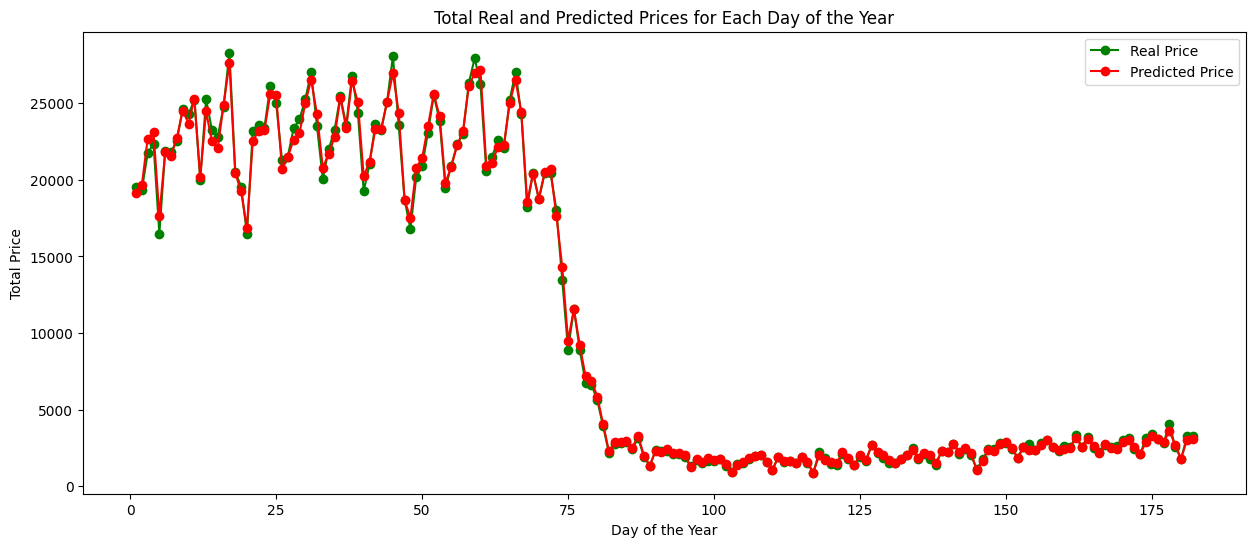

In [57]:
from pyspark.sql.functions import dayofyear

# Add a new column for day of the year
predictions = predictions.withColumn("pickup_day_of_year", dayofyear("lpep_pickup_datetime"))

# Now, you can proceed with the plotting code
day_prices = predictions.select("pickup_day_of_year", "fare_amount", "prediction").toPandas()

# Aggregate total real and predicted prices for each day of the year
agg_data = day_prices.groupby("pickup_day_of_year").agg({"fare_amount": "sum", "prediction": "sum"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_day_of_year"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Real Price')
plt.plot(agg_data["pickup_day_of_year"], agg_data["prediction"], marker='o', linestyle='-', color='red', label='Predicted Price')

plt.title('Total Real and Predicted Prices for Each Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Total Price')
plt.legend()
plt.show()


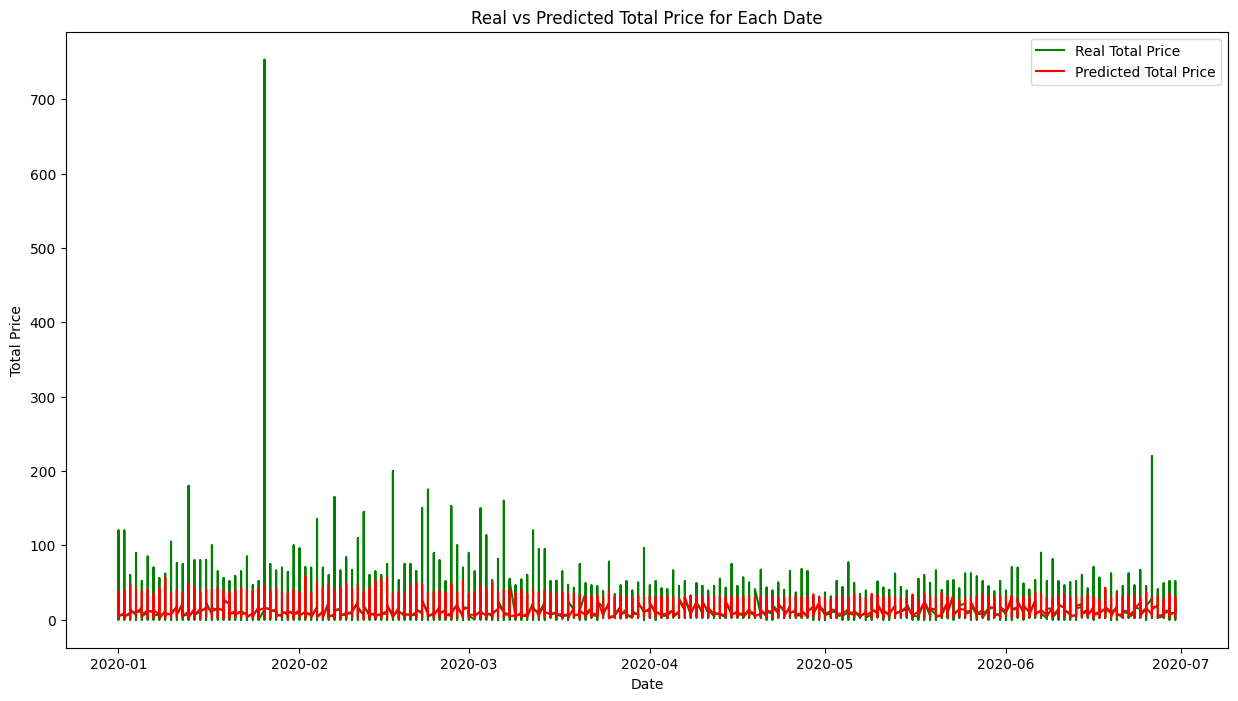

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col

# Calculate total real price and predicted price for each date
daily_totals = predictions.groupBy("lpep_pickup_datetime") \
    .agg({"fare_amount": "sum", "prediction": "sum"}) \
    .withColumnRenamed("sum(fare_amount)", "real_total_price") \
    .withColumnRenamed("sum(prediction)", "predicted_total_price") \
    .orderBy("lpep_pickup_datetime") \
    .toPandas()

# Convert timestamp to date
daily_totals["date"] = pd.to_datetime(daily_totals["lpep_pickup_datetime"]).dt.date

# Plot the results with connected lines
plt.figure(figsize=(15, 8))
plt.plot(daily_totals["date"], daily_totals["real_total_price"], linestyle='-', color='green', label='Real Total Price')
plt.plot(daily_totals["date"], daily_totals["predicted_total_price"], linestyle='-', color='red', label='Predicted Total Price')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.title('Real vs Predicted Total Price for Each Date')
plt.legend()
plt.show()


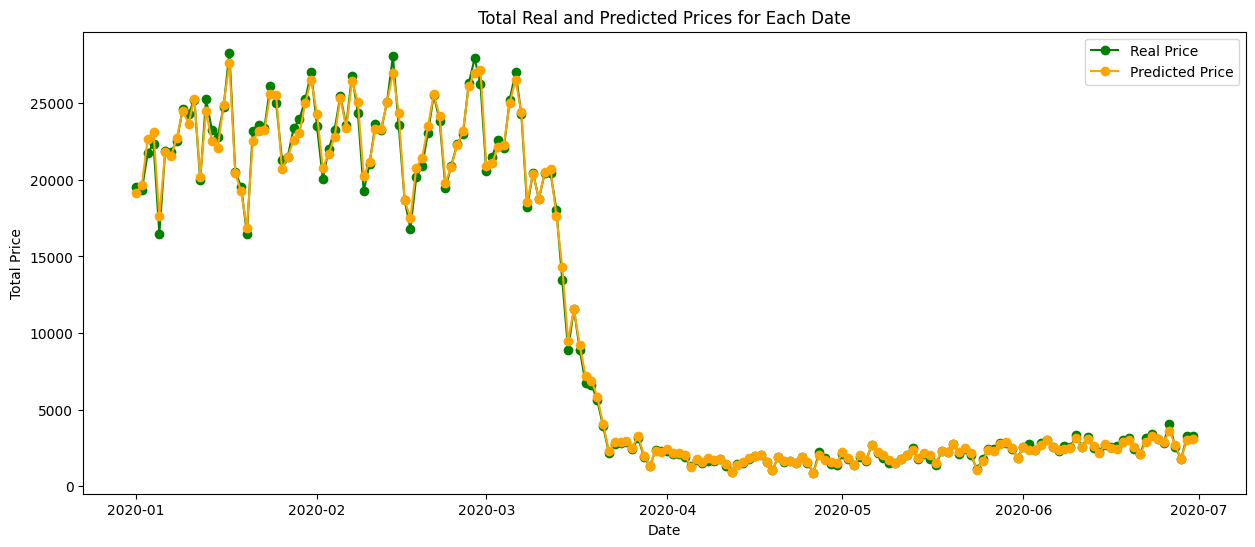

In [59]:
from pyspark.sql.functions import col, to_date

# Assuming 'lpep_pickup_datetime' is the timestamp column in your dataset
predictions = predictions.withColumn("pickup_date", to_date(col("lpep_pickup_datetime")))

# Convert the Spark DataFrame to a Pandas DataFrame
day_prices = predictions.select("pickup_date", "fare_amount", "prediction").toPandas()

# Aggregate total real and predicted prices for each date
agg_data = day_prices.groupby("pickup_date").agg({"fare_amount": "sum", "prediction": "sum"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_date"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Real Price')
plt.plot(agg_data["pickup_date"], agg_data["prediction"], marker='o', linestyle='-', color='orange', label='Predicted Price')

plt.title('Total Real and Predicted Prices for Each Date')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()


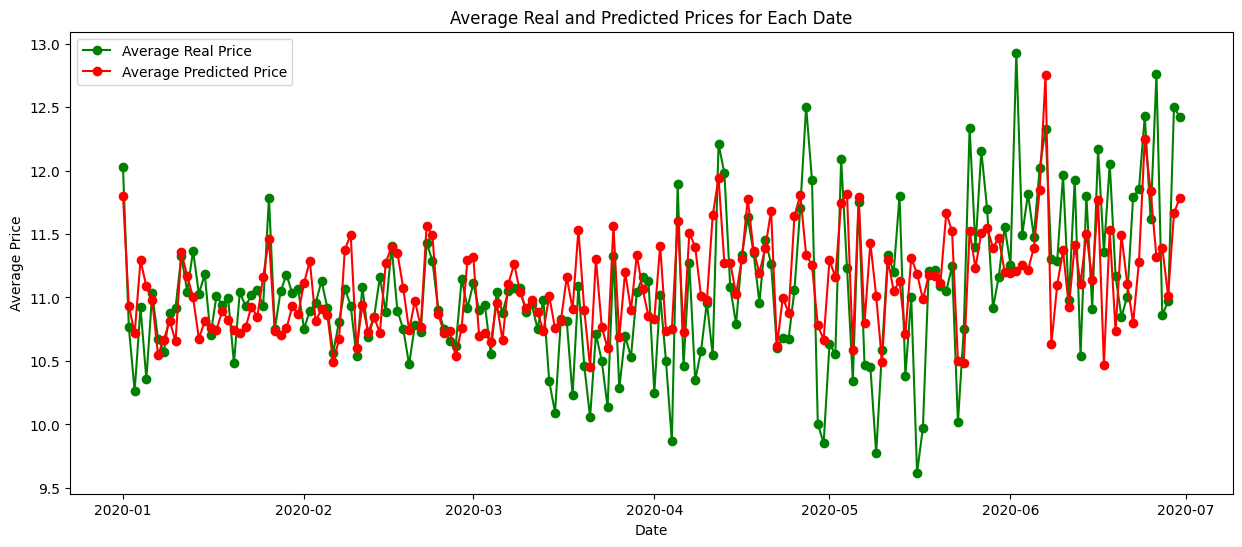

In [60]:
from pyspark.sql.functions import col, to_date
import matplotlib.pyplot as plt

# Assuming 'lpep_pickup_datetime' is the timestamp column in your dataset
predictions = predictions.withColumn("pickup_date", to_date(col("lpep_pickup_datetime")))

# Convert the Spark DataFrame to a Pandas DataFrame
day_prices = predictions.select("pickup_date", "fare_amount", "prediction").toPandas()

# Aggregate average real and predicted prices for each date
agg_data = day_prices.groupby("pickup_date").agg({"fare_amount": "mean", "prediction": "mean"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(agg_data["pickup_date"], agg_data["fare_amount"], marker='o', linestyle='-', color='green', label='Average Real Price')
plt.plot(agg_data["pickup_date"], agg_data["prediction"], marker='o', linestyle='-', color='red', label='Average Predicted Price')

plt.title('Average Real and Predicted Prices for Each Date')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import dayofyear
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Define two sets of feature columns
feature_columns1 = [
    "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
    "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
    'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
    'payment_type', 'trip_type', 'max_temp', 'max_uv', 'max_wind_spd',
    'min_temp', 'precip', 'snow', 'snow_depth', 'solar_rad'
]

feature_columns2 = [
    "pickup_year", "pickup_week", "pickup_day", "pickup_hour", "pickup_minute",
    "dropoff_year", "dropoff_week", "dropoff_day", "dropoff_hour", "dropoff_minute",
    'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
    'payment_type', 'trip_type'
]

# Split the data into training and testing sets
train_data, test_data = merged_data.randomSplit([0.8, 0.2], seed=42)

# Create two Vector Assemblers
assembler1 = VectorAssembler(inputCols=feature_columns1, outputCol="features1")
assembler2 = VectorAssembler(inputCols=feature_columns2, outputCol="features2")

# Transform the datasets with each Vector Assembler
train_data1 = assembler1.transform(train_data)
test_data1 = assembler1.transform(test_data)

train_data2 = assembler2.transform(train_data)
test_data2 = assembler2.transform(test_data)

# Linear Regression models with default parameters
lr1 = LinearRegression(featuresCol="features1", labelCol="fare_amount", predictionCol="prediction1")
lr2 = LinearRegression(featuresCol="features2", labelCol="fare_amount", predictionCol="prediction2")

# Fit the models
model1 = lr1.fit(train_data1)
model2 = lr2.fit(train_data2)

# Make predictions on the test sets
predictions1 = model1.transform(test_data1)
predictions2 = model2.transform(test_data2)


In [91]:
# Evaluate the models
evaluator_rmse1 = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction1", metricName="rmse")
evaluator_rmse = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction2", metricName="rmse")

rmse1 = evaluator_rmse1.evaluate(predictions1)
rmse2 = evaluator_rmse.evaluate(predictions2)

print("Model 1 - Root Mean Squared Error (RMSE) on test data:", rmse1)
print("Model 2 - Root Mean Squared Error (RMSE) on test data:", rmse2)

# Plotting
def plot_prices(predictions, label, color):
    day_prices = predictions.select("pickup_day_of_year", "fare_amount", "prediction").toPandas()
    agg_data = day_prices.groupby("pickup_day_of_year").agg({"fare_amount": "sum", "prediction": "sum"}).reset_index()

    plt.plot(agg_data["pickup_day_of_year"], agg_data["fare_amount"], marker='o', linestyle='-', color=color, label=f'{label} - Real Price')
    plt.plot(agg_data["pickup_day_of_year"], agg_data["prediction"], marker='o', linestyle='-', color=color, linestyle='dashed', label=f'{label} - Predicted Price')


plt.figure(figsize=(15, 6))

plot_prices(predictions1, "Model 1", 'green')
plot_prices(predictions2, "Model 2", 'red')

plt.title('Total Real and Predicted Prices for Each Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Total Price')
plt.legend()
plt.show()


Model 1 - Root Mean Squared Error (RMSE) on test data: 5.185356515331539
Model 2 - Root Mean Squared Error (RMSE) on test data: 5.1860108398977784


SyntaxError: keyword argument repeated: linestyle (<ipython-input-91-81910e80d9a3>, line 17)

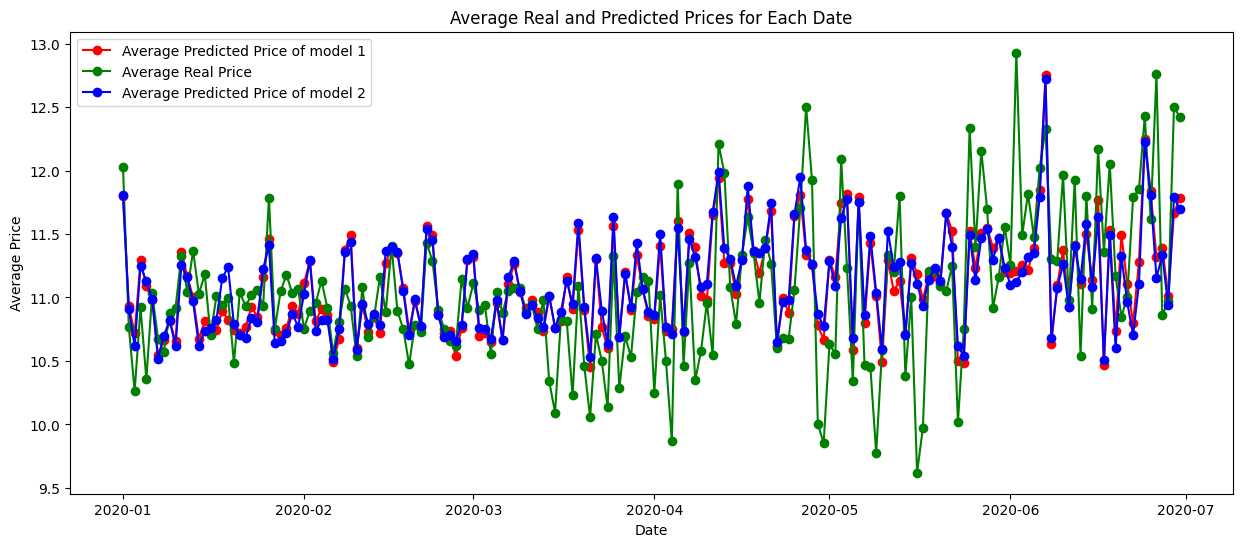

In [102]:
# Convert the Spark DataFrame to a Pandas DataFrame
day_prices1 = predictions1.select("pickup_date", "fare_amount", "prediction1").toPandas()

day_prices2 = predictions2.select("pickup_date", "fare_amount", "prediction2").toPandas()

# Aggregate average real and predicted prices for each date
agg_data1 = day_prices1.groupby("pickup_date").agg({"fare_amount": "mean", "prediction1": "mean"}).reset_index()
agg_data2 = day_prices2.groupby("pickup_date").agg({"fare_amount": "mean", "prediction2": "mean"}).reset_index()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(agg_data1["pickup_date"], agg_data1["prediction1"], marker='o', linestyle='-', color='red', label='Average Predicted Price of model 1')
plt.plot(agg_data1["pickup_date"], agg_data1["fare_amount"], marker='o', linestyle='-', color='green', label='Average Real Price')
plt.plot(agg_data2["pickup_date"], agg_data2["prediction2"], marker='o', linestyle='-', color='blue', label='Average Predicted Price of model 2')

plt.title('Average Real and Predicted Prices for Each Date')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

## analysis

In [61]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count
from datetime import datetime

# Create a Spark session
spark = SparkSession.builder.appName("TaxiDataAnalysis").getOrCreate()

# Assuming your taxi_data DataFrame is already loaded

# Extract date from 'lpep_pickup_datetime' column
taxi_data = taxi_data.withColumn("pickup_date", col("lpep_pickup_datetime").cast("date"))

# Filter data for the year 2020
taxi_data_2020 = taxi_data.filter((col("pickup_date") >= datetime(2020, 1, 1)) & (col("pickup_date") <= datetime(2020, 12, 31)))

# Group by date and calculate count of trips, sum of distances, and sum of amount money
daily_summary = taxi_data_2020.groupBy("pickup_date").agg(
    count("VendorID").alias("num_trips"),
    sum("trip_distance").alias("total_distance"),
    sum("total_amount").alias("total_amount_money")
)

# Show the resulting DataFrame
daily_summary.show()


+-----------+---------+------------------+------------------+
|pickup_date|num_trips|    total_distance|total_amount_money|
+-----------+---------+------------------+------------------+
| 2020-01-21|    10611|22102.860000000008|147458.33000000313|
| 2020-02-04|    10200|22222.199999999917|143348.97000000562|
| 2020-02-15|    10594|24618.939999999995|144928.10000000583|
| 2020-02-12|    11062|24197.499999999927| 153301.8700000007|
| 2020-01-17|    12520|26549.830000000027| 172133.8399999904|
| 2020-01-25|    11160| 25598.29999999977| 153121.6900000016|
| 2020-02-11|    10055|21830.889999999996| 140652.7000000065|
| 2020-02-09|     8776|21422.140000000065|122501.22000001115|
| 2020-01-10|    11528|24932.079999999965|160730.21999999683|
| 2020-01-24|    11660| 25117.09000000011|162495.86999999537|
| 2020-01-04|    10267| 24356.47999999995|138167.63000000943|
| 2020-02-01|    10806|24471.649999999943|145765.40000000567|
| 2020-01-11|    11208|26273.889999999978|157122.78999999972|
| 2020-0

In [62]:
# Join taxi data with weather data on datetime
joined_data = daily_summary.join(weather_df, daily_summary["pickup_date"] == weather_df["datetime0"], "left")


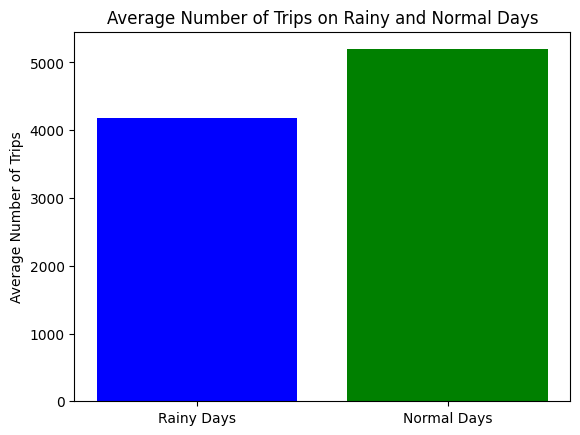

In [64]:
import matplotlib.pyplot as plt

# Analyze the average number of trips on rainy days
rainy_days_avg_trips = joined_data.filter(col("precip") > 0).agg(avg("num_trips").alias("avg_trips_on_rainy_days")).collect()[0].avg_trips_on_rainy_days

# Analyze the average number of trips on normal (non-rainy) days
normal_days_avg_trips = joined_data.filter(col("precip") == 0).agg(avg("num_trips").alias("avg_trips_on_normal_days")).collect()[0].avg_trips_on_normal_days

# Plotting the results
categories = ['Rainy Days', 'Normal Days']
values = [rainy_days_avg_trips, normal_days_avg_trips]

plt.bar(categories, values, color=['blue', 'green'])
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips on Rainy and Normal Days')
plt.show()


In [68]:
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType

# Assuming joined_data is already defined

# Convert columns to FloatType
joined_data = joined_data.withColumn("max_temp", col("max_temp").cast(FloatType()))
joined_data = joined_data.withColumn("num_trips", col("num_trips").cast(FloatType()))

# Analyze the correlation between temperature and the number of trips
temperature_correlation = joined_data.stat.corr("max_temp", "num_trips")
print("Correlation between temperature and number of trips:", temperature_correlation)


Correlation between temperature and number of trips: -0.6623647266669374


<ipython-input-72-4ab8d23ab78b>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


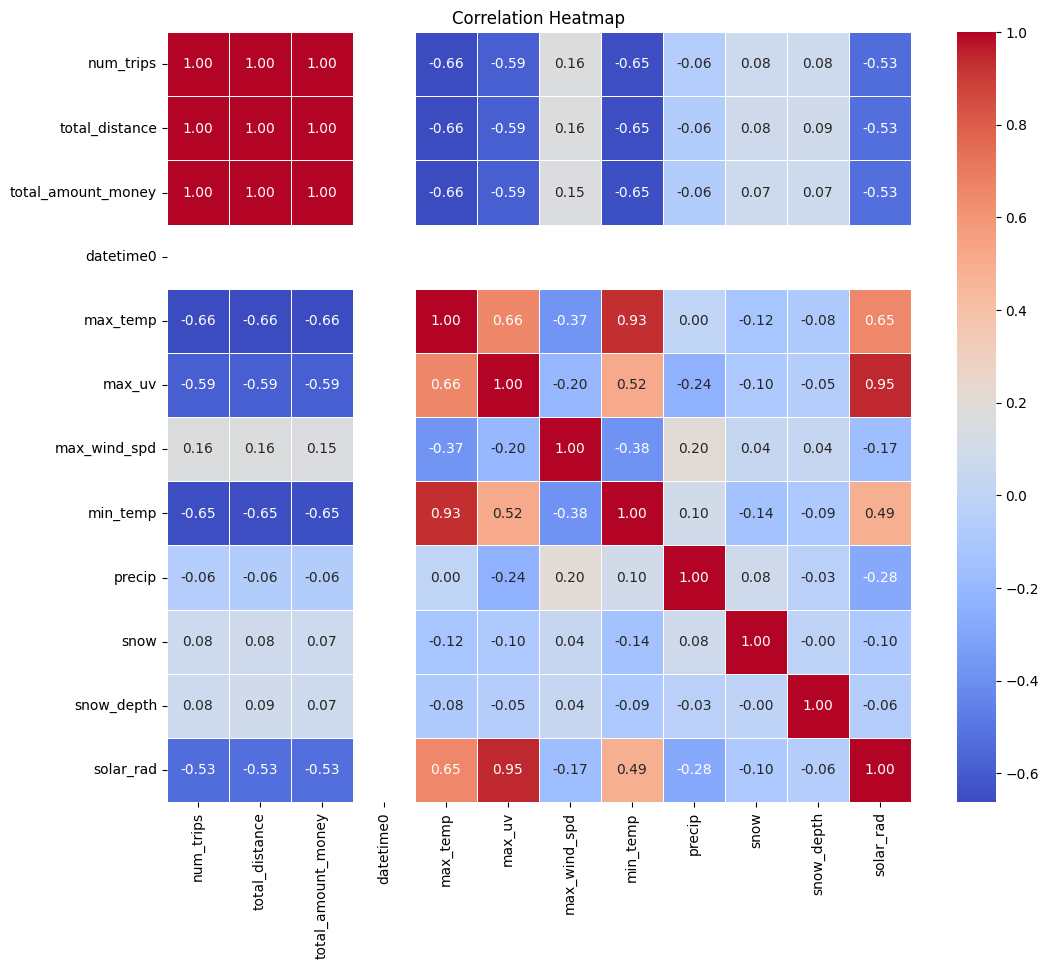

In [72]:
import pandas as pd
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("CorrelationHeatmap").getOrCreate()


# Convert PySpark DataFrame to Pandas DataFrame
df = joined_data.toPandas()


# Assuming df is your DataFrame
# You may need to handle non-numeric values or missing values before conversion
df['num_trips'] = pd.to_numeric(df['num_trips'], errors='coerce')
df['total_distance'] = pd.to_numeric(df['total_distance'], errors='coerce')
df['total_amount_money'] = pd.to_numeric(df['total_amount_money'], errors='coerce')
df['datetime0'] = pd.to_numeric(df['datetime0'], errors='coerce')
df['max_temp'] = pd.to_numeric(df['max_temp'], errors='coerce')
df['max_uv'] = pd.to_numeric(df['max_uv'], errors='coerce')
df['max_wind_spd'] = pd.to_numeric(df['max_wind_spd'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['precip'] = pd.to_numeric(df['precip'], errors='coerce')
df['snow'] = pd.to_numeric(df['snow'], errors='coerce')
df['snow_depth'] = pd.to_numeric(df['snow_depth'], errors='coerce')
df['solar_rad'] = pd.to_numeric(df['solar_rad'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [73]:
from pyspark.sql.functions import col

# Assuming joined_data is your PySpark DataFrame
# Replace 'joined_data' with the actual name of your DataFrame

# Convert non-date columns to numeric types
joined_data = joined_data.withColumn("num_trips", col("num_trips").cast("float"))
joined_data = joined_data.withColumn("total_distance", col("total_distance").cast("double"))
joined_data = joined_data.withColumn("total_amount_money", col("total_amount_money").cast("double"))
joined_data = joined_data.withColumn("datetime0", col("datetime0").cast("double"))
joined_data = joined_data.withColumn("max_temp", col("max_temp").cast("float"))
joined_data = joined_data.withColumn("max_uv", col("max_uv").cast("float"))
joined_data = joined_data.withColumn("max_wind_spd", col("max_wind_spd").cast("float"))
joined_data = joined_data.withColumn("min_temp", col("min_temp").cast("float"))
joined_data = joined_data.withColumn("precip", col("precip").cast("float"))
joined_data = joined_data.withColumn("snow", col("snow").cast("float"))
joined_data = joined_data.withColumn("snow_depth", col("snow_depth").cast("float"))
joined_data = joined_data.withColumn("solar_rad", col("solar_rad").cast("float"))

# Check the data types after conversion
joined_data.printSchema()


root
 |-- pickup_date: date (nullable = true)
 |-- num_trips: float (nullable = false)
 |-- total_distance: double (nullable = false)
 |-- total_amount_money: double (nullable = false)
 |-- datetime0: double (nullable = true)
 |-- max_temp: float (nullable = true)
 |-- max_uv: float (nullable = true)
 |-- max_wind_spd: float (nullable = true)
 |-- min_temp: float (nullable = true)
 |-- precip: float (nullable = true)
 |-- snow: float (nullable = true)
 |-- snow_depth: float (nullable = true)
 |-- solar_rad: float (nullable = true)



In [75]:
from pyspark.sql.functions import when

# Assuming joined_data is already defined

# Define wind speed classes
joined_data = joined_data.withColumn(
    "wind_speed_class",
    when((col("max_wind_spd") >= 0) & (col("max_wind_spd") < 1), "Class 0-1")
    .when((col("max_wind_spd") >= 1) & (col("max_wind_spd") < 2), "Class 1-2")
    .when((col("max_wind_spd") >= 2) & (col("max_wind_spd") < 3), "Class 2-3")
    .when((col("max_wind_spd") >= 3) & (col("max_wind_spd") < 4), "Class 3-4")
    .when((col("max_wind_spd") >= 4) & (col("max_wind_spd") < 5), "Class 4-5")
    .when((col("max_wind_spd") >= 5) & (col("max_wind_spd") < 6), "Class 5-6")
    .when((col("max_wind_spd") >= 6) & (col("max_wind_spd") < 7), "Class 6-7")
    .when((col("max_wind_spd") >= 7) & (col("max_wind_spd") < 8), "Class 7-8")
    .when((col("max_wind_spd") >= 8) & (col("max_wind_spd") < 9), "Class 8-9")
    .when((col("max_wind_spd") >= 9), "Class 9+")
    .otherwise("Unknown")
)

# Analyze the impact of wind speed classes on the number of trips
wind_speed_effect = joined_data.groupBy("wind_speed_class").agg(avg("num_trips").alias("avg_trips")).orderBy("wind_speed_class")
wind_speed_effect.show()


+----------------+------------------+
|wind_speed_class|         avg_trips|
+----------------+------------------+
|       Class 3-4|            3859.8|
|       Class 4-5|           2382.35|
|       Class 5-6| 4264.535714285715|
|       Class 6-7| 5515.792452830188|
|       Class 7-8|5490.6551724137935|
|       Class 8-9| 4740.823529411765|
|        Class 9+| 6079.619047619048|
+----------------+------------------+



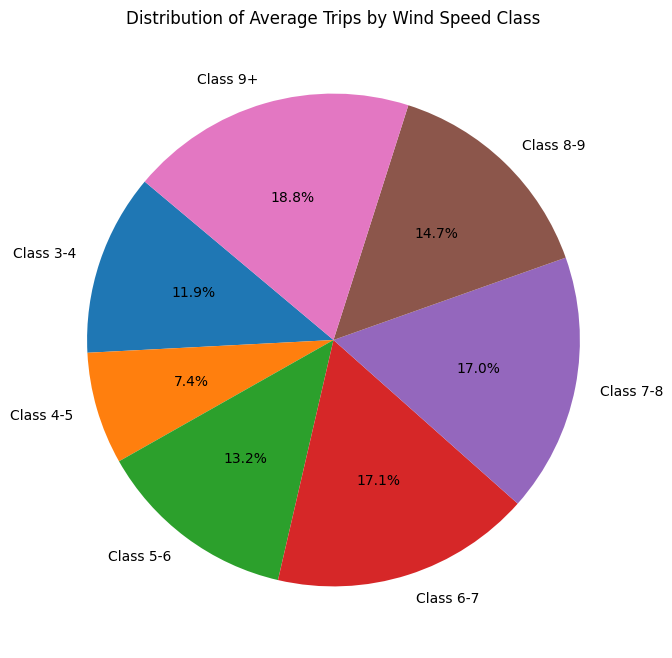

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming wind_speed_effect is your PySpark DataFrame
# Replace 'wind_speed_effect' with the actual name of your DataFrame

# Collect data to the driver
wind_speed_pandas = wind_speed_effect.toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(wind_speed_pandas['avg_trips'], labels=wind_speed_pandas['wind_speed_class'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Average Trips by Wind Speed Class')
plt.show()


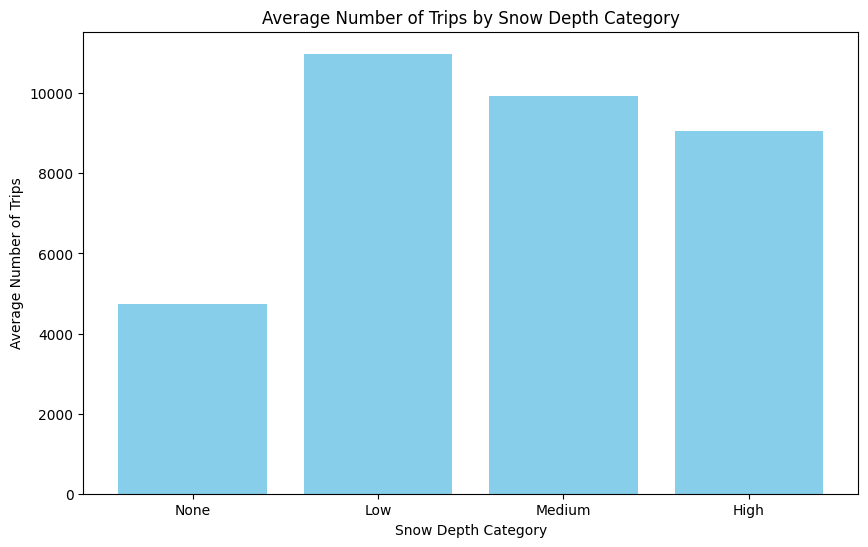

In [84]:
from pyspark.sql.functions import avg

# Convert columns to numeric type if needed
joined_data = joined_data.withColumn("snow_depth", col("snow_depth").cast("float"))
joined_data = joined_data.withColumn("total_amount_money", col("total_amount_money").cast("float"))
joined_data = joined_data.withColumn("num_trips", col("num_trips").cast("float"))

# Calculate average total amount of money and average number of trips for each snow depth
snow_depth_amount_effect = joined_data.groupBy("snow_depth").agg(
    avg("total_amount_money").alias("avg_amount_money"),
    avg("num_trips").alias("avg_num_trips")
).orderBy("snow_depth")

import matplotlib.pyplot as plt
import pandas as pd

# Assuming snow_depth_amount_effect is your PySpark DataFrame
# Replace 'snow_depth_amount_effect' with the actual name of your DataFrame

# Collect data to the driver
snow_depth_pandas = snow_depth_amount_effect.toPandas()

# Map snow depth values to categories (none, low, medium, high)
def categorize_snow_depth(snow_depth):
    if snow_depth == 0:
        return 'None'
    elif snow_depth < 2:
        return 'Low'
    elif snow_depth < 5:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to create a new column 'snow_depth_category'
snow_depth_pandas['snow_depth_category'] = snow_depth_pandas['snow_depth'].apply(categorize_snow_depth)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(snow_depth_pandas['snow_depth_category'], snow_depth_pandas['avg_num_trips'], color='skyblue')
plt.xlabel('Snow Depth Category')
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips by Snow Depth Category')
plt.show()


In [82]:
from pyspark.sql.functions import when

# Convert columns to numeric type if needed
joined_data = joined_data.withColumn("precip", col("precip").cast("float"))
joined_data = joined_data.withColumn("total_amount_money", col("total_amount_money").cast("float"))

# Classify precipitation into 6 classes
joined_data = joined_data.withColumn("precip_class", when((col("precip") >= 0) & (col("precip") < 5), 1)
                                         .when((col("precip") >= 5) & (col("precip") < 10), 2)
                                         .when((col("precip") >= 10) & (col("precip") < 15), 3)
                                         .when((col("precip") >= 15) & (col("precip") < 20), 4)
                                         .when((col("precip") >= 20) , 5)
                                         .otherwise(0))

# Calculate average total amount of money for each precipitation class
rain_amount_effect = joined_data.groupBy("precip_class").agg(avg("num_trips").alias("avg_trips")).orderBy("precip_class")

rain_amount_effect.show()


+------------+------------------+
|precip_class|         avg_trips|
+------------+------------------+
|           1| 4909.466666666666|
|           2|5064.2307692307695|
|           3| 5468.777777777777|
|           4|3067.8333333333335|
|           5|            2980.4|
+------------+------------------+



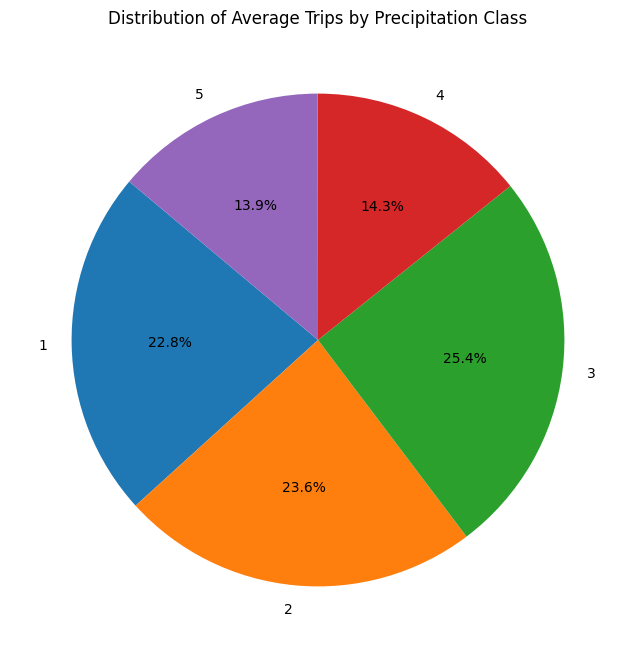

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rain_amount_effect is your PySpark DataFrame
# Replace 'rain_amount_effect' with the actual name of your DataFrame

# Collect data to the driver
rain_amount_pandas = rain_amount_effect.toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rain_amount_pandas['avg_trips'], labels=rain_amount_pandas['precip_class'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Average Trips by Precipitation Class')
plt.show()


In [88]:
from pyspark.sql.functions import desc

# Calculate the average price per record
joined_data = joined_data.withColumn("average_price", col("total_amount_money") / col("total_distance"))

# Analyze the average price on different days of the week
day_of_week_avg_price = joined_data.groupBy(dayofweek("pickup_date").alias("day")).agg(avg("average_price").alias("avg_price")).orderBy(desc("day"))
day_of_week_avg_price.show()


+---+------------------+
|day|         avg_price|
+---+------------------+
|  7| 5.782004801393957|
|  6| 6.182739148977349|
|  5| 6.152680310652467|
|  4| 6.218550076412868|
|  3| 6.150406993410239|
|  2| 6.188651638884835|
|  1|5.8470879467956065|
+---+------------------+



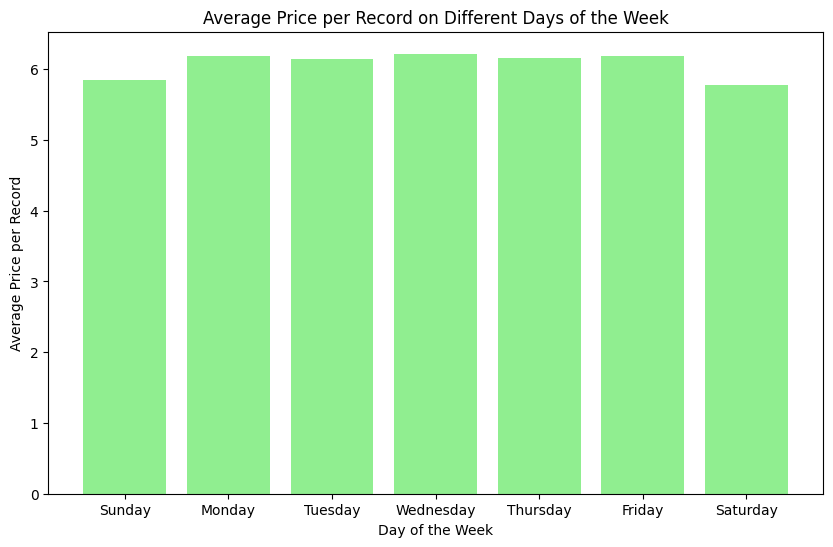

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming day_of_week_avg_price is your PySpark DataFrame
# Replace 'day_of_week_avg_price' with the actual name of your DataFrame

# Collect data to the driver
day_of_week_pandas = day_of_week_avg_price.toPandas()

# Map day values to weekday names
day_of_week_pandas['day_name'] = day_of_week_pandas['day'].map({
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
})

# Order by ascending day
day_of_week_pandas = day_of_week_pandas.sort_values('day')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_pandas['day_name'], day_of_week_pandas['avg_price'], color='lightgreen')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price per Record')
plt.title('Average Price per Record on Different Days of the Week')
plt.show()
